In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<17:22:24> Checking library dependencies ...
<17:22:24> Using the following libraries:
<17:22:24> 	scipy (v0.18.0)
<17:22:24> 	statsmodels (v0.6.1)
<17:22:24> 	scikit-learn (v0.17.1)
<17:22:24> 	seaborn (v0.7.1)
<17:22:24> 	rpy2 (v2.8.2)
<17:22:24> 	pandas (v0.18.1)
<17:22:24> 	matplotlib (v1.5.1)
<17:22:24> 	numpy (v1.11.1)
<17:22:24> Planted a random seed 20121020.


# Get states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
nclustering = 500
filename_prefix = 'output/ccle_hema_k_9_H_1000clustering_0828'

In [3]:
# labels, memberships, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename_prefix=filename_prefix)

# Map Onco-GPS

In [4]:
labels = pd.read_csv(filename_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filename_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]))#,
#                              background_markersize=0, background_mask_markersize=0)
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]))#,
#                              background_markersize=0, background_mask_markersize=0, mds_is_metric=False)
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]))#,
#                              background_markersize=0, background_mask_markersize=0, informational_mds=False)
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.random_sample(h.shape[1]))#
#                              background_markersize=0, background_mask_markersize=0)
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.choice(range(5), h.shape[1]),
                             annotation_type='categorical')#
#                              background_markersize=0, background_mask_markersize=0)
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.choice(range(2), h.shape[1]),
                             annotation_type='binary')#
#                              background_markersize=0, background_mask_markersize=0)

<17:22:24> Creating Onco-GPS with 166 samples, 9 components, and 12 states [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<17:22:25> Converting association to distance (1 - association) ...
<17:22:25> Computing the sample_stretch_factor ...
<17:22:25> 	Modeled H columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<17:22:25> 	sample_stretch_factor = 1.953.


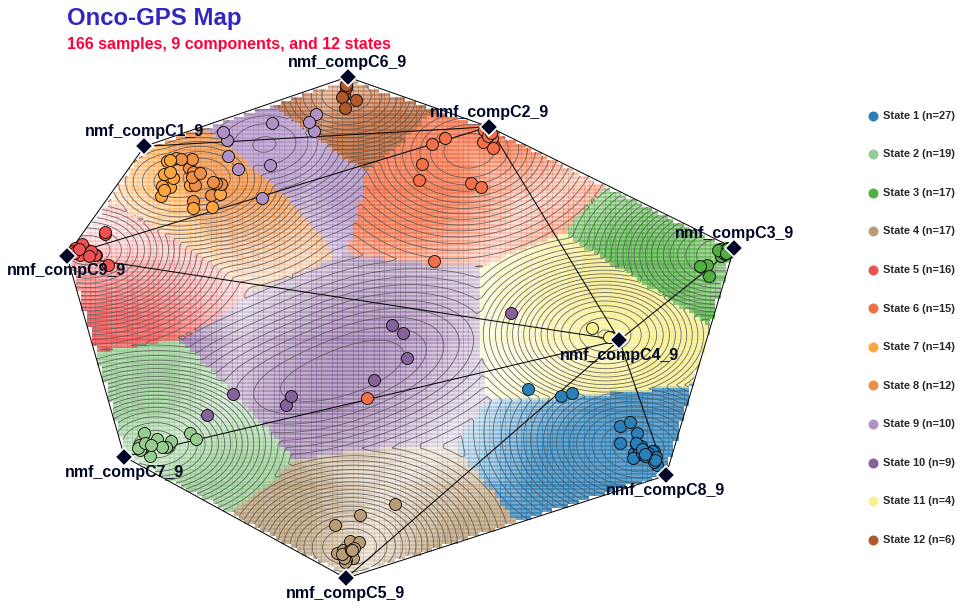

<17:23:08> Creating Onco-GPS with 166 samples, 9 components, and 12 states [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<17:23:09> Converting association to distance (1 - association) ...
<17:23:09> Computing the sample_stretch_factor ...
<17:23:09> 	Modeled H columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<17:23:09> 	sample_stretch_factor = 1.953.


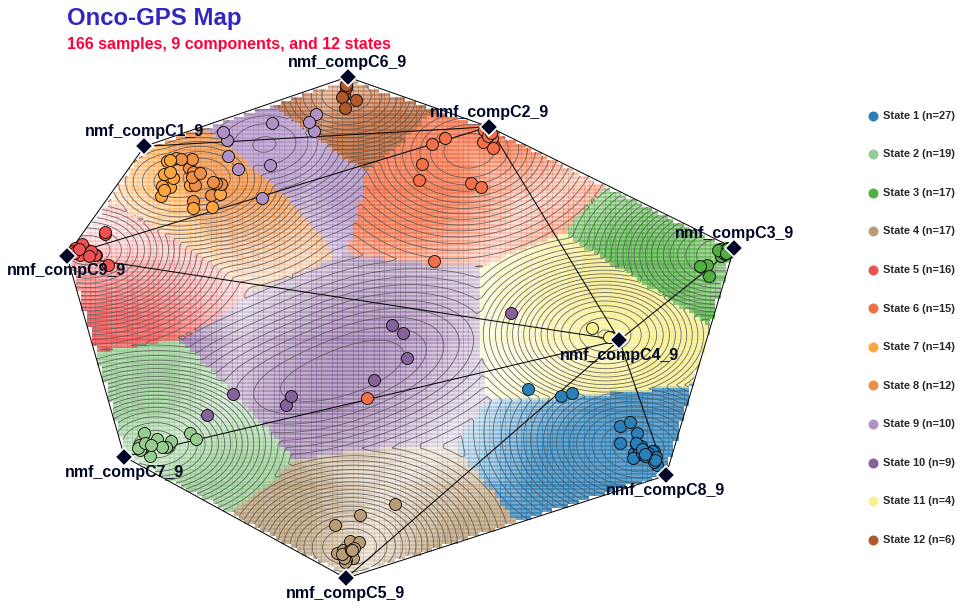

<17:23:53> Creating Onco-GPS with 166 samples, 9 components, and 12 states [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<17:23:54> Computing the sample_stretch_factor ...
<17:23:54> 	Modeled H columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<17:23:54> 	sample_stretch_factor = 1.953.


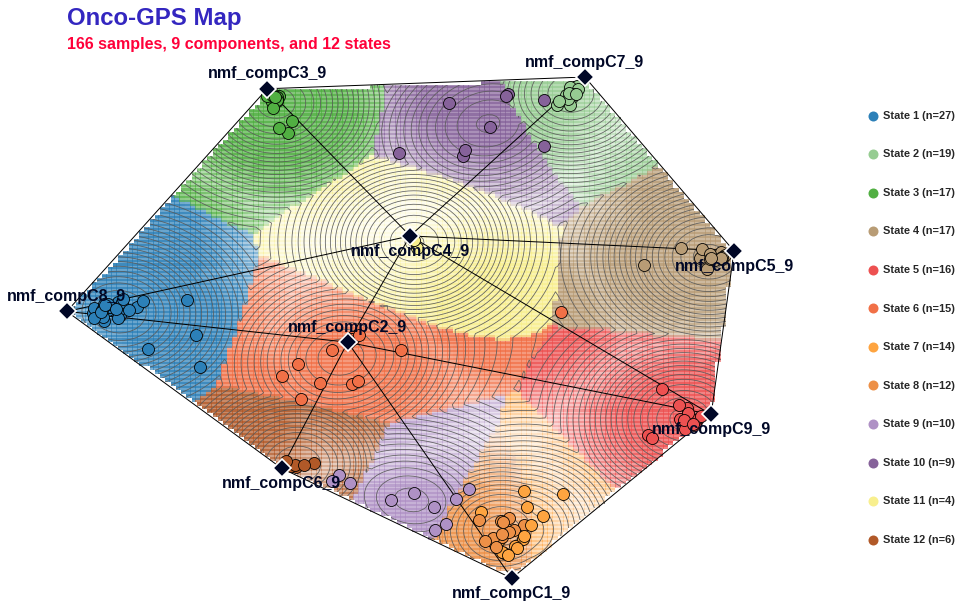

<17:24:39> Creating Onco-GPS with 166 samples, 9 components, and 12 states [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] ...
<17:24:39> Computing the sample_stretch_factor ...
<17:24:39> 	Modeled H columns by 0.0003977486304175168e^(0.9527092629787737x) + 0.03312059144984009.
<17:24:39> 	sample_stretch_factor = 1.953.


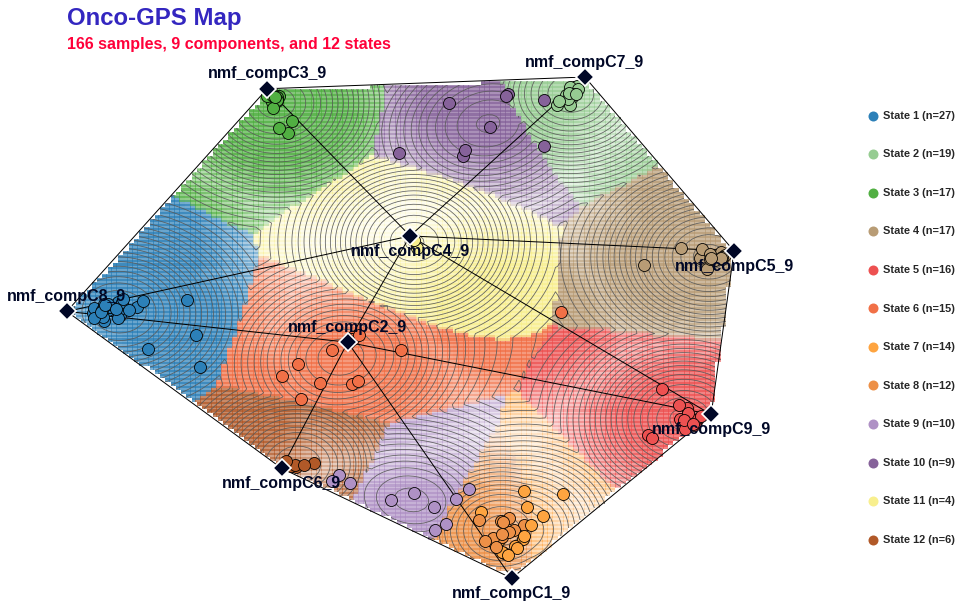

In [5]:
for n_state in [12]:# n_states_to_explore:
    states = labels.ix[n_state, :-1].astype(int).tolist()
    signature = 'mds_informational_metric'
    ccal.visualize.plot_onco_gps(h, states, mds_is_metric=True, informational_mds=True, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'mds_informational_no_metric'
    ccal.visualize.plot_onco_gps(h, states, mds_is_metric=False, informational_mds=True, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'mds_no_informational_metric'
    ccal.visualize.plot_onco_gps(h, states, mds_is_metric=True, informational_mds=False, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'mds_no_informational_no_metric'
    ccal.visualize.plot_onco_gps(h, states, mds_is_metric=False, informational_mds=False, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
#     signature = 'populate_random'
#     ccal.visualize.plot_onco_gps(h, states, annotations=annotations, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))